In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X = X[y != 2]
y = y[y != 2]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


In [26]:
C_values = [0.01, 0.1, 1, 10, 100]
train_accs = []
val_accs = []
support_vectors = []


In [27]:
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=40, edgecolors='k')
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                s=100, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()


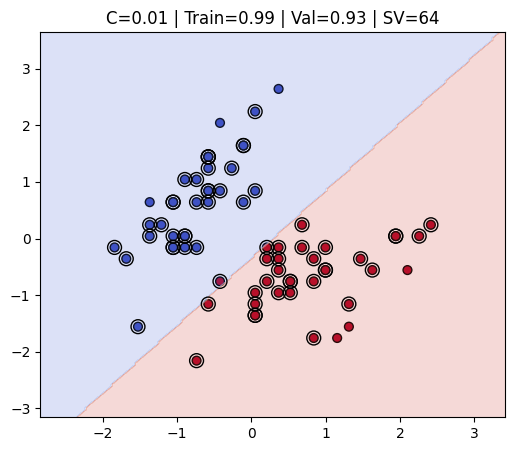

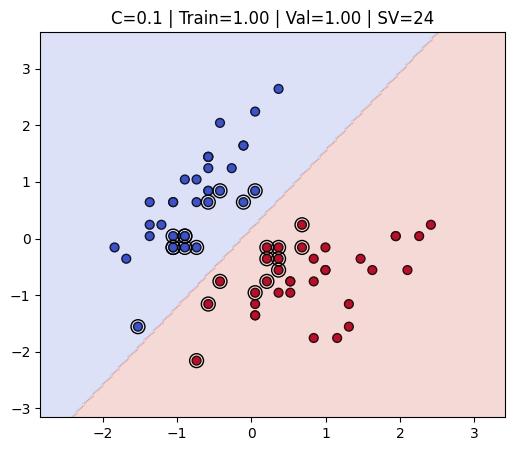

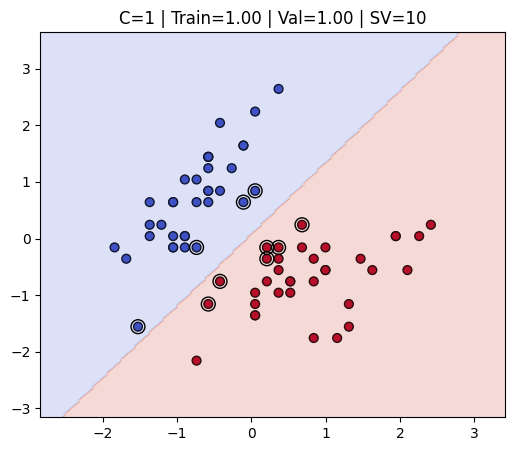

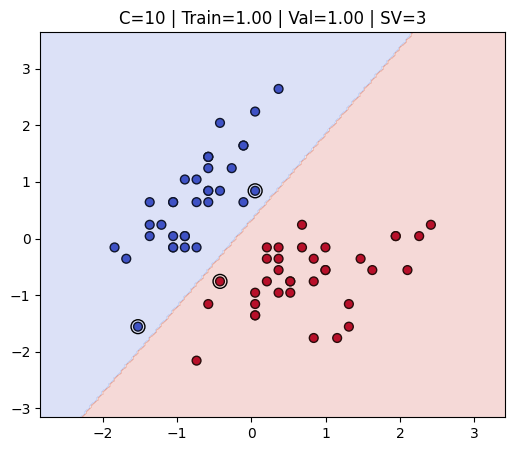

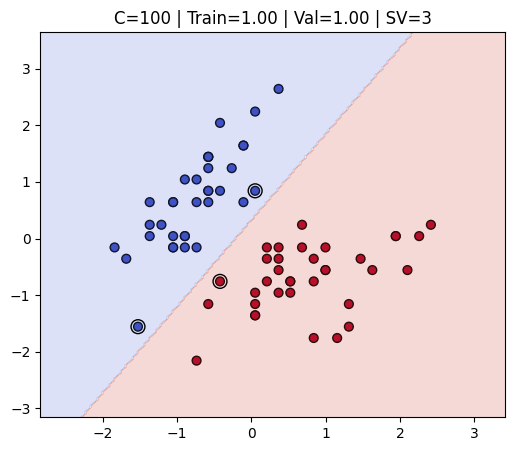

In [28]:
train_accs = []
val_accs = []
support_vectors = []

for C in C_values:
    svm = SVC(kernel='linear', C=C, random_state=42)
    svm.fit(X_train, y_train)

    y_pred_train = svm.predict(X_train)
    y_pred_val = svm.predict(X_val)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    num_sv = len(svm.support_)

    train_accs.append(train_acc)
    val_accs.append(val_acc)
    support_vectors.append(num_sv)

    title = f"C={C} | Train={train_acc:.2f} | Val={val_acc:.2f} | SV={num_sv}"
    plot_decision_boundary(svm, X_train, y_train, title)


In [29]:
results = pd.DataFrame({
    'C': C_values,
    'Train Acc': train_accs,
    'Val Acc': val_accs,
    'Support Vectors': support_vectors
})
results


,C,Train Acc,Val Acc,Support Vectors
0,0.01,0.985714,0.933333,64
1,0.10,1.000000,1.000000,24
2,1.00,1.000000,1.000000,10
3,10.00,1.000000,1.000000,3
4,100.00,1.000000,1.000000,3


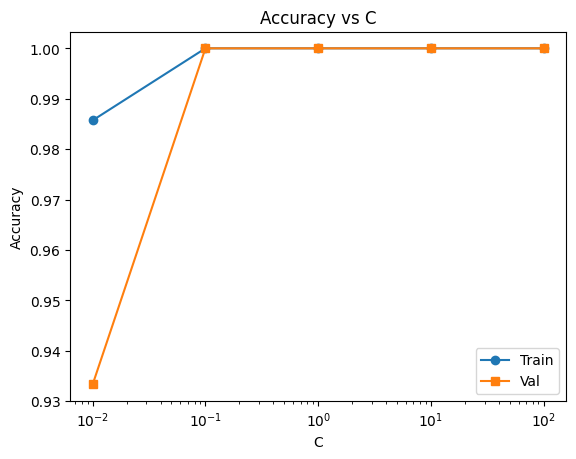

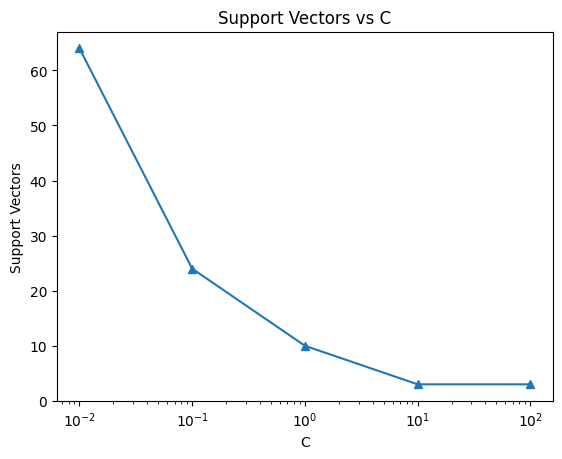

In [30]:
plt.plot(C_values, train_accs, marker='o', label='Train')
plt.plot(C_values, val_accs, marker='s', label='Val')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C')
plt.legend()
plt.show()

plt.plot(C_values, support_vectors, marker='^')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Support Vectors')
plt.title('Support Vectors vs C')
plt.show()


In [32]:
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)
y = 2 * y - 1

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [34]:
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(6,5))
    plt.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm', s=40, edgecolors='k')
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')
    plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                s=100, facecolors='none', edgecolors='k')
    plt.title(title)
    plt.show()


In [35]:
models = []

# Linear
models.append(("Linear", SVC(kernel='linear', C=1, random_state=42)))

# Polynomial degree 2 and 3
models.append(("Poly (deg=2)", SVC(kernel='poly', degree=2, C=1, random_state=42)))
models.append(("Poly (deg=3)", SVC(kernel='poly', degree=3, C=1, random_state=42)))

# RBF with tuned gamma values
models.append(("RBF (gamma=0.5)", SVC(kernel='rbf', gamma=0.5, C=1, random_state=42)))
models.append(("RBF (gamma=1)",   SVC(kernel='rbf', gamma=1,   C=1, random_state=42)))


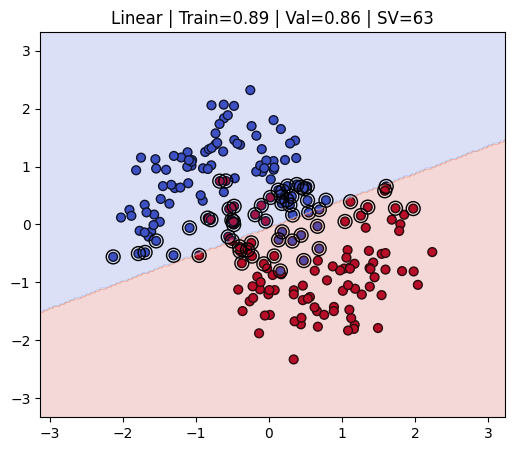

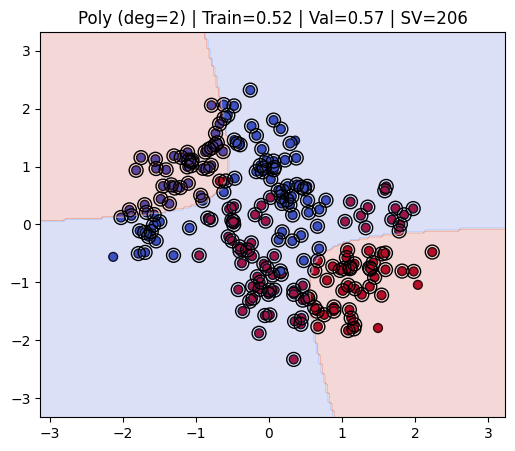

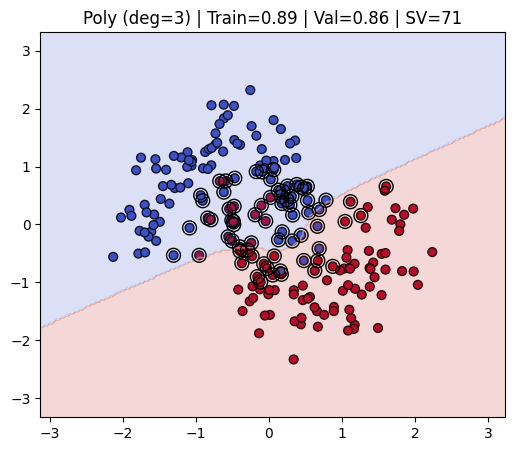

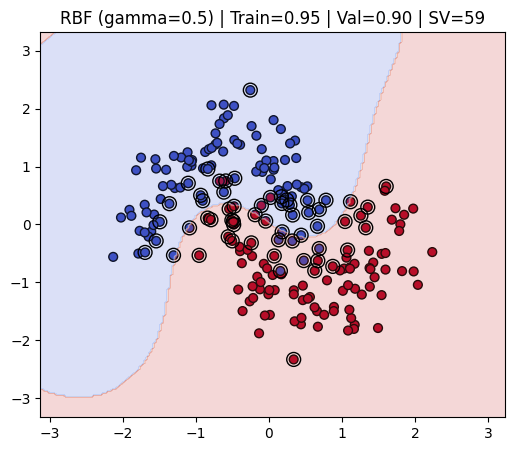

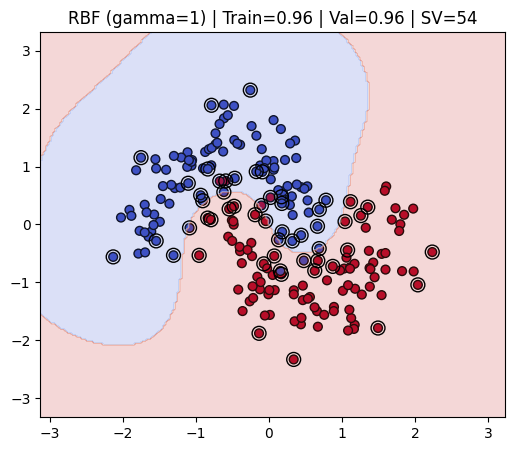

In [37]:
train_accs = []
val_accs = []
support_vectors = []

for name, clf in models:
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_val)

    train_acc = accuracy_score(y_train, y_pred_train)
    val_acc = accuracy_score(y_val, y_pred_val)
    num_sv = len(clf.support_)

    train_accs.append(train_acc)
    val_accs.append(val_acc)
    support_vectors.append(num_sv)

    title = f"{name} | Train={train_acc:.2f} | Val={val_acc:.2f} | SV={num_sv}"
    plot_decision_boundary(clf, X_train, y_train, title)


In [38]:
results = pd.DataFrame({
    'Kernel': [m[0] for m in models],
    'Train Acc': train_accs,
    'Val Acc': val_accs,
    'Support Vectors': support_vectors
})
results


,Kernel,Train Acc,Val Acc,Support Vectors
0,Linear,0.885714,0.855556,63
1,Poly (deg=2),0.519048,0.566667,206
2,Poly (deg=3),0.890476,0.855556,71
3,RBF (gamma=0.5),0.947619,0.900000,59
4,RBF (gamma=1),0.957143,0.955556,54
